In [3]:
import pickle
import numpy as np

import sys
sys.path.append('../../')
from decimal import *

import bemppUQ
config = bemppUQ.config.set_case('A')

with open('results/full/output_full.txt', "rb") as fp:   # Unpickling
    output = pickle.load(fp)

result0 = output['result0']
result1 = output['result1']
Umean0 = output['Umean0']
Umean1 = output['Umean1']

In [4]:

n = config['number_of_angles']


axis = 2
nrank = 1
Sigma = np.zeros((n, n), dtype=np.complex128)
k = 0
for ii in range(nrank):
    for jj in range(nrank):
        ff0 = result0[k][axis]
        ff1 = result1[k][axis]
        Sigma += 1/3. * bemppUQ.utils.login.tensorize(ff0,ff1)
        k += 1
        
t = 0.05
Uvars = t ** 2 * Sigma.diagonal()
Umeans = Umean1[axis]

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


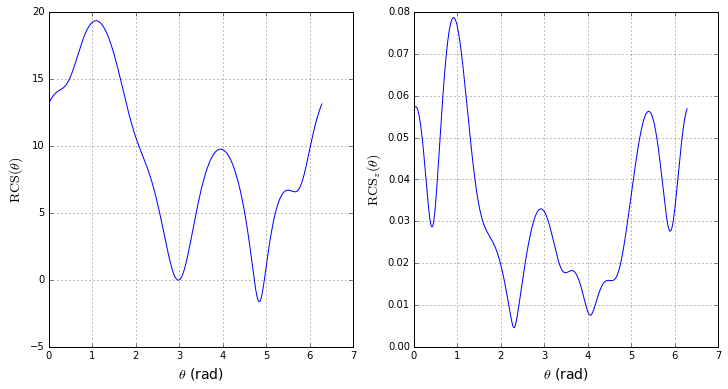

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

angles = config['angles']

fig, (ax1, ax2)  = plt.subplots(1,2, figsize=(12,6))

cs = 10 * np.log10(4 * np.pi * np.abs(Umeans)**2)

ax1.plot(angles, cs)


y = np.sqrt(np.abs(Uvars))

ax2.plot(angles, y)


ax2.set_xlabel(r'$\theta$ (rad)', fontsize=14)
ax2.set_ylabel(r'$\mathrm{RCS}_z(\theta)$', fontsize=14)


ax1.set_xlabel(r'$\theta$ (rad)', fontsize=14)
ax1.set_ylabel(r'$\mathrm{RCS}(\theta)$', fontsize=14)

ax1.legend()
ax1.grid()

ax2.legend()
ax2.grid()
#ax2.set_ylim(0, 0.013)

#plt.savefig('results/LowRank.pdf')
plt.show(block=False)
